In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [ ]:
depthwise_filter = np.array([[[1, 2, 1], [2, 4, 2], [1, 2, 1]], [[1, 2, 1], [2, 4, 2], [1, 2, 1]], [[1, 2, 1], [2, 4, 2], [1, 2, 1]]])/16 
pointwise_filter = np.array([[1], [1], [1]])/512 

In [ ]:
def depthwise_conv2d(input, w):
    """Two-dimensional depthwise convolution.

    Uses SAME padding with 0s, a stride of 1 and no dilation. A single output
    channel is used per input channel (channel_multiplier=1).

    input: input array with shape (height, width, in_depth)
    w: filter array with shape (fd, fd, in_depth)

    Returns a result with shape (height, width, in_depth).
    """
    assert w.shape[0] == w.shape[1] and w.shape[0] % 2 == 1

    padw = w.shape[0] // 2
    padded_input = np.pad(input,
                          pad_width=((padw, padw), (padw, padw), (0, 0)),
                          mode='constant',
                          constant_values=0)

    height, width, in_depth = input.shape
    assert in_depth == w.shape[2]
    output = np.zeros((height, width, in_depth))

    for c in range(in_depth):
        # For each input channel separately, apply its corresponsing filter
        # to the input.
        for i in range(height):
            for j in range(width):
                for fi in range(w.shape[0]):
                    for fj in range(w.shape[1]):
                        w_element = w[fi, fj, c]
                        output[i, j, c] += (
                            padded_input[i + fi, j + fj, c] * w_element)
    return output

In [ ]:
def separable_conv2d(input, w_depth, w_pointwise):
    """Depthwise separable convolution.

    Performs 2d depthwise convolution with w_depth, and then applies a pointwise
    1x1 convolution with w_pointwise on the result.

    Uses SAME padding with 0s, a stride of 1 and no dilation. A single output
    channel is used per input channel (channel_multiplier=1) in w_depth.

    input: input array with shape (height, width, in_depth)
    w_depth: depthwise filter array with shape (fd, fd, in_depth)
    w_pointwise: pointwise filter array with shape (in_depth, out_depth)

    Returns a result with shape (height, width, out_depth).
    """
    # First run the depthwise convolution. Its result has the same shape as input.
    depthwise_result = depthwise_conv2d(input, w_depth)

    height, width, in_depth = depthwise_result.shape
    assert in_depth == w_pointwise.shape[0]
    out_depth = w_pointwise.shape[1]
    output = np.zeros((height, width, out_depth))

    for out_c in range(out_depth):
        for i in range(height):
            for j in range(width):
                for c in range(in_depth):
                    w_element = w_pointwise[c, out_c]
                    output[i, j, out_c] += depthwise_result[i, j, c] * w_element
    return output

In [ ]:
img = cv2.imread("lena.jpg")
part_a = separable_conv2d(img,depthwise_filter,pointwise_filter)

In [ ]:
part_a.shape

(512, 512, 1)

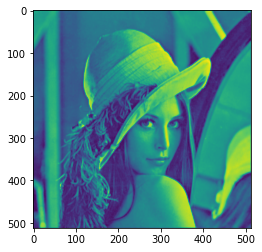

In [ ]:
plt.imshow(part_a[:,:,0])

In [ ]:
filter = np.array([[1, 2, 1],[2, 4, 2], [1, 2, 1]])/16

In [ ]:
tf_opreation1_1 = tf.nn.conv2d(np.expand_dims(np.expand_dims(img,axis=0),axis=3),
                            np.expand_dims(np.expand_dims(np.rot90(filter,2),axis=3),axis=4),
                            strides=[1,1,1,1],padding="VALID",
                            dilations=[1,1,1,1])
tf_result = sess.run(tf_opreation1_1)
print("Tensorfow Conv2D Results Shape: ",tf_result.shape)
print(np.squeeze(tf_result))

AxisError: axis 3 is out of bounds for array of dimension 3